# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [59]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn. over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression


# Load the dataset


In [60]:
df=pd.read_csv('/content/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [61]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [62]:
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high
6323,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [64]:
df['Traffic Situation'].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

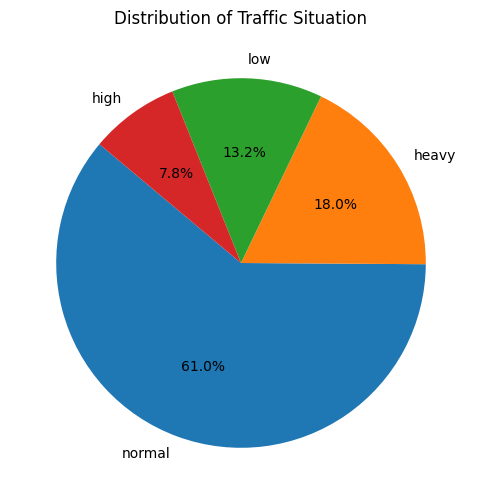

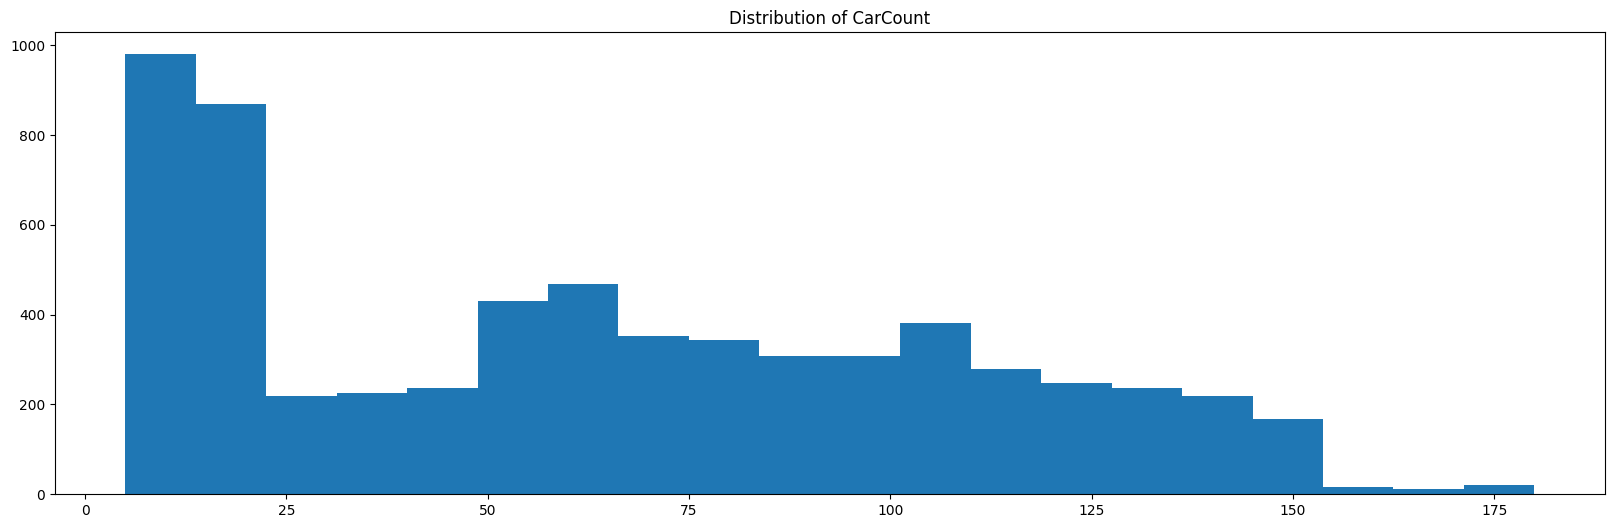

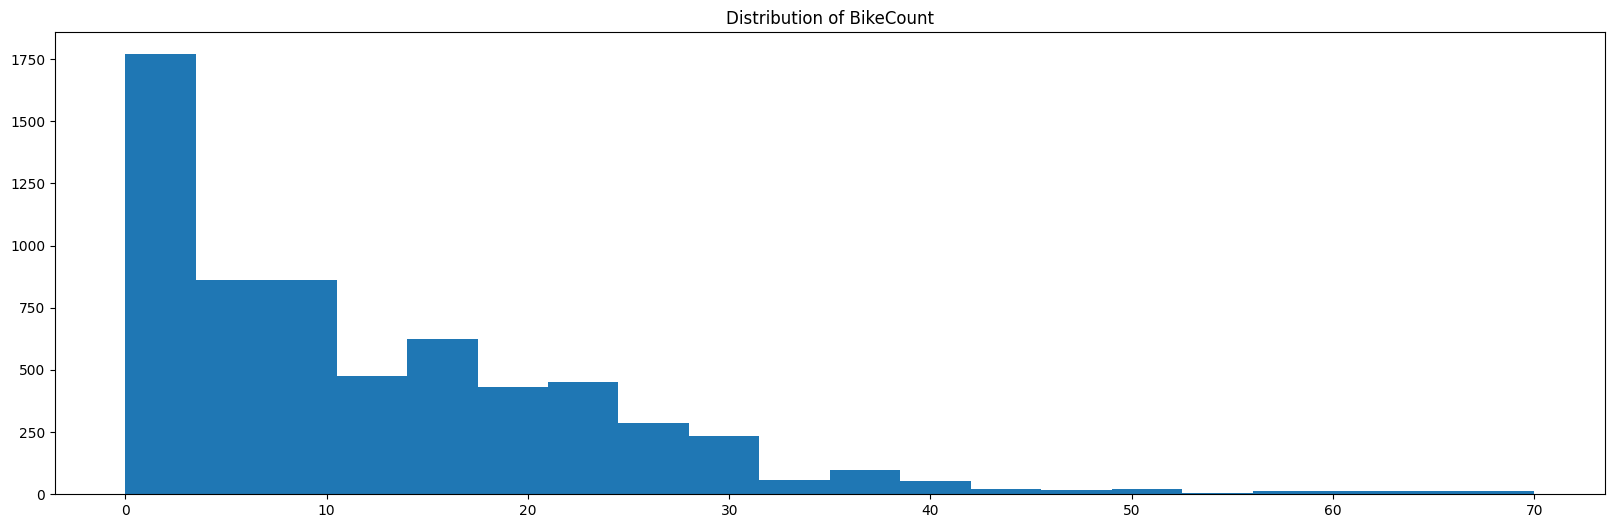

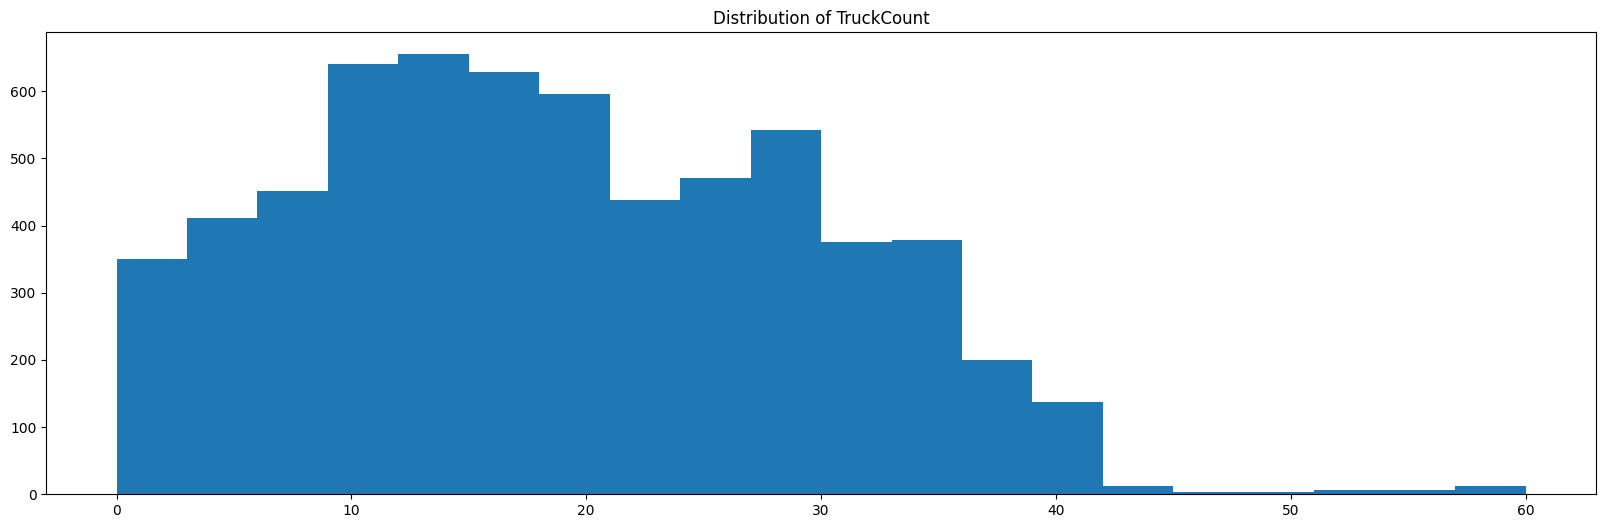

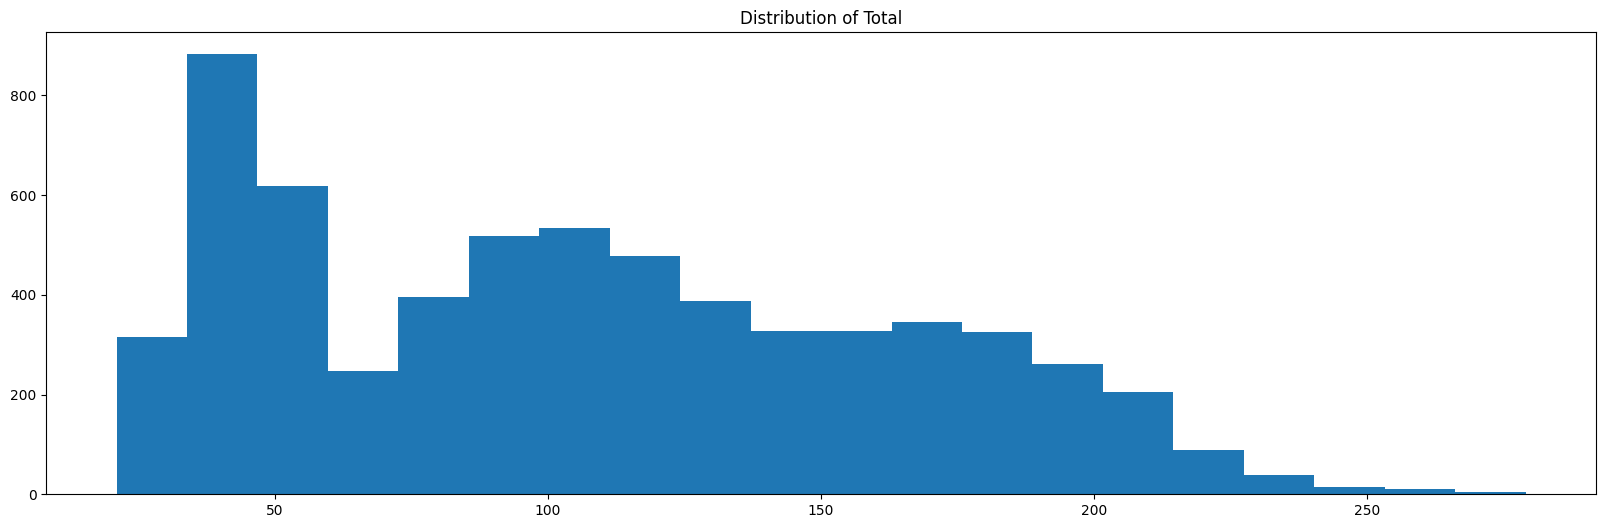

In [65]:
plt.figure(figsize=(20, 6))
plt.pie(df['Traffic Situation'].value_counts(),labels=df['Traffic Situation'].value_counts().index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Traffic Situation')
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(df['CarCount'],bins=20)
plt.title('Distribution of CarCount')
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(df['BikeCount'],bins=20)
plt.title('Distribution of BikeCount')
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(df['TruckCount'],bins=20)
plt.title('Distribution of TruckCount')
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(df['Total'],bins=20)
plt.title('Distribution of Total')
plt.show()


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [66]:
df.isna().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [67]:
df.duplicated().sum()

0

In [68]:
df=pd.get_dummies(df,columns=['Day of the week'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time                       6324 non-null   object
 1   Date                       6324 non-null   int64 
 2   CarCount                   6324 non-null   int64 
 3   BikeCount                  6324 non-null   int64 
 4   BusCount                   6324 non-null   int64 
 5   TruckCount                 6324 non-null   int64 
 6   Total                      6324 non-null   int64 
 7   Traffic Situation          6324 non-null   object
 8   Day of the week_Friday     6324 non-null   bool  
 9   Day of the week_Monday     6324 non-null   bool  
 10  Day of the week_Saturday   6324 non-null   bool  
 11  Day of the week_Sunday     6324 non-null   bool  
 12  Day of the week_Thursday   6324 non-null   bool  
 13  Day of the week_Tuesday    6324 non-null   bool  
 14  Day of t

In [70]:
df[['Day of the week_Friday','Day of the week_Monday','Day of the week_Saturday','Day of the week_Sunday','Day of the week_Thursday', 'Day of the week_Tuesday','Day of the week_Wednesday']]=df[['Day of the week_Friday','Day of the week_Monday','Day of the week_Saturday','Day of the week_Sunday','Day of the week_Thursday', 'Day of the week_Tuesday','Day of the week_Wednesday']].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time                       6324 non-null   object
 1   Date                       6324 non-null   int64 
 2   CarCount                   6324 non-null   int64 
 3   BikeCount                  6324 non-null   int64 
 4   BusCount                   6324 non-null   int64 
 5   TruckCount                 6324 non-null   int64 
 6   Total                      6324 non-null   int64 
 7   Traffic Situation          6324 non-null   object
 8   Day of the week_Friday     6324 non-null   int64 
 9   Day of the week_Monday     6324 non-null   int64 
 10  Day of the week_Saturday   6324 non-null   int64 
 11  Day of the week_Sunday     6324 non-null   int64 
 12  Day of the week_Thursday   6324 non-null   int64 
 13  Day of the week_Tuesday    6324 non-null   int64 
 14  Day of t

In [72]:
df.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,12:00:00 AM,10,13,2,2,24,41,normal,0,0,0,0,0,1,0
1,12:15:00 AM,10,14,1,1,36,52,normal,0,0,0,0,0,1,0
2,12:30:00 AM,10,10,2,2,32,46,normal,0,0,0,0,0,1,0
3,12:45:00 AM,10,10,2,2,36,50,normal,0,0,0,0,0,1,0
4,1:00:00 AM,10,11,2,1,34,48,normal,0,0,0,0,0,1,0


In [73]:
df['Traffic Situation']=LabelEncoder().fit_transform(df['Traffic Situation'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time                       6324 non-null   object
 1   Date                       6324 non-null   int64 
 2   CarCount                   6324 non-null   int64 
 3   BikeCount                  6324 non-null   int64 
 4   BusCount                   6324 non-null   int64 
 5   TruckCount                 6324 non-null   int64 
 6   Total                      6324 non-null   int64 
 7   Traffic Situation          6324 non-null   int64 
 8   Day of the week_Friday     6324 non-null   int64 
 9   Day of the week_Monday     6324 non-null   int64 
 10  Day of the week_Saturday   6324 non-null   int64 
 11  Day of the week_Sunday     6324 non-null   int64 
 12  Day of the week_Thursday   6324 non-null   int64 
 13  Day of the week_Tuesday    6324 non-null   int64 
 14  Day of t

In [75]:
df.drop('Time',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Date                       6324 non-null   int64
 1   CarCount                   6324 non-null   int64
 2   BikeCount                  6324 non-null   int64
 3   BusCount                   6324 non-null   int64
 4   TruckCount                 6324 non-null   int64
 5   Total                      6324 non-null   int64
 6   Traffic Situation          6324 non-null   int64
 7   Day of the week_Friday     6324 non-null   int64
 8   Day of the week_Monday     6324 non-null   int64
 9   Day of the week_Saturday   6324 non-null   int64
 10  Day of the week_Sunday     6324 non-null   int64
 11  Day of the week_Thursday   6324 non-null   int64
 12  Day of the week_Tuesday    6324 non-null   int64
 13  Day of the week_Wednesday  6324 non-null   int64
dtypes: int64(14)
memory usag

In [76]:
df.shape

(6324, 14)

In [77]:
columns=df.columns

for col in columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.85)
  IQR=Q3-Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  df = df[(df[col] >= lb) & (df[col] <= ub)]

df.shape

(4678, 14)

In [82]:
df.columns

Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Traffic Situation', 'Day of the week_Friday', 'Day of the week_Monday',
       'Day of the week_Saturday', 'Day of the week_Sunday',
       'Day of the week_Thursday', 'Day of the week_Tuesday',
       'Day of the week_Wednesday'],
      dtype='object')

In [84]:
df['Day of the week_Friday'].unique()

array([0])

In [85]:
df['Day of the week_Monday'].unique()

array([0])

In [86]:
df.drop('Day of the week_Friday',axis=1,inplace=True)
df.drop('Day of the week_Monday',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4678 entries, 0 to 6323
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Date                       4678 non-null   int64
 1   CarCount                   4678 non-null   int64
 2   BikeCount                  4678 non-null   int64
 3   BusCount                   4678 non-null   int64
 4   TruckCount                 4678 non-null   int64
 5   Total                      4678 non-null   int64
 6   Traffic Situation          4678 non-null   int64
 7   Day of the week_Saturday   4678 non-null   int64
 8   Day of the week_Sunday     4678 non-null   int64
 9   Day of the week_Thursday   4678 non-null   int64
 10  Day of the week_Tuesday    4678 non-null   int64
 11  Day of the week_Wednesday  4678 non-null   int64
dtypes: int64(12)
memory usage: 475.1 KB


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

<Axes: >

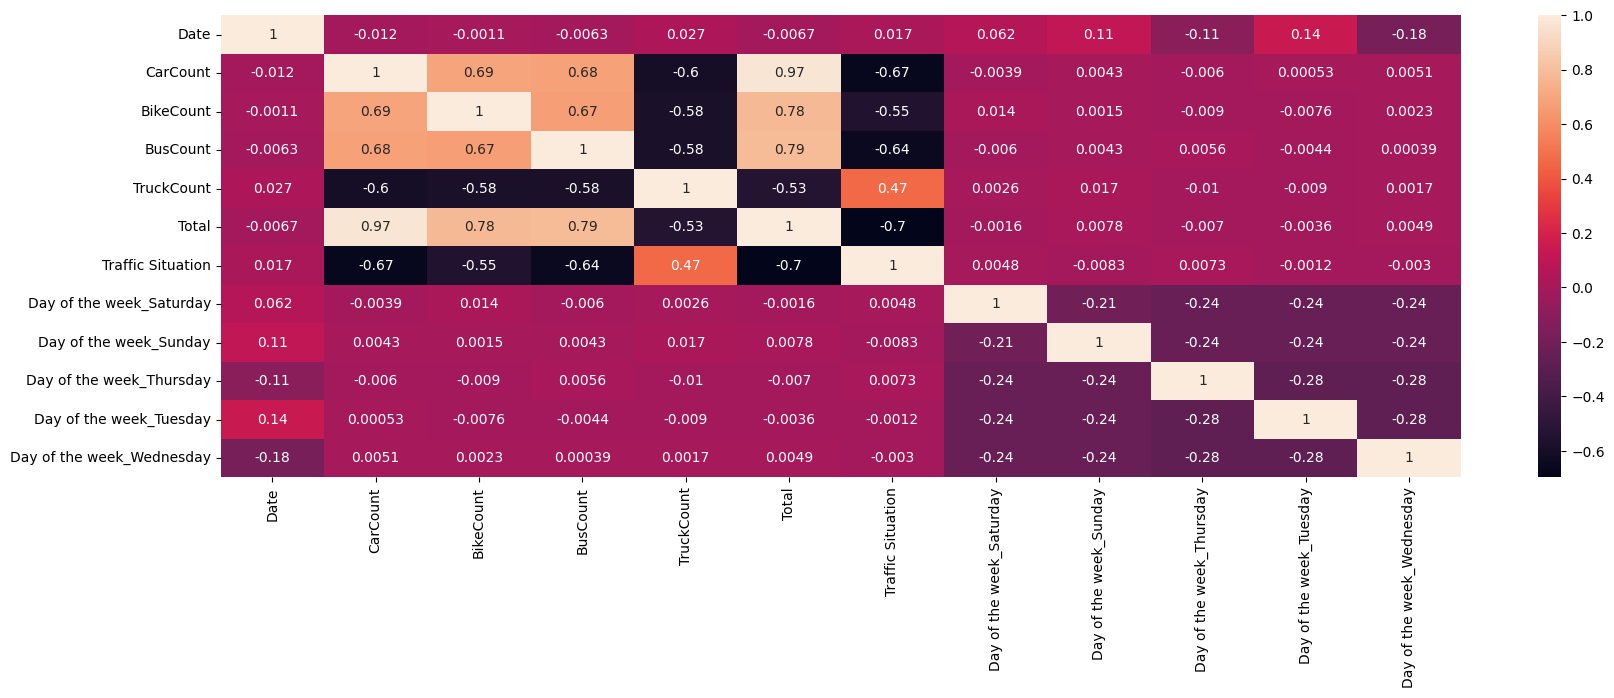

In [87]:
plt.figure(figsize=(20, 6))

sns.heatmap(df.corr(),annot=True)


# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [88]:
X=df.drop('Traffic Situation',axis=1)
y=df['Traffic Situation']

In [89]:
X.head()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,10,13,2,2,24,41,0,0,0,1,0
1,10,14,1,1,36,52,0,0,0,1,0
2,10,10,2,2,32,46,0,0,0,1,0
3,10,10,2,2,36,50,0,0,0,1,0
4,10,11,2,1,34,48,0,0,0,1,0


In [90]:
y.head()

,Traffic Situation
0,3
1,3
2,3
3,3
4,3


In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [112]:
Bagging_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', BaggingClassifier(RandomForestClassifier(n_estimators=50, random_state=42)))
])
Bagging_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 BaggingClassifier(estimator=RandomForestClassifier(n_estimators=50,
                                                                    random_state=42)))])

### Evaluate the model performance

In [113]:
print(confusion_matrix(y_test,Bagging_model.predict(X_test)))
print(classification_report(y_test,Bagging_model.predict(X_test)))

[[210   0   0   0]
 [  0  73   0  24]
 [  0   0  94  24]
 [  1  21  44 679]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       0.78      0.75      0.76        97
           2       0.68      0.80      0.73       118
           3       0.93      0.91      0.92       745

    accuracy                           0.90      1170
   macro avg       0.85      0.87      0.85      1170
weighted avg       0.91      0.90      0.90      1170



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [114]:
Boosting_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(n_estimators=50, random_state=42))
])
Boosting_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

### Evaluate the model performance

In [115]:
print(confusion_matrix(y_test,Boosting_model.predict(X_test)))
print(classification_report(y_test,Boosting_model.predict(X_test)))

[[210   0   0   0]
 [  0  71   0  26]
 [  0   0  98  20]
 [  0  20  46 679]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       0.78      0.73      0.76        97
           2       0.68      0.83      0.75       118
           3       0.94      0.91      0.92       745

    accuracy                           0.90      1170
   macro avg       0.85      0.87      0.86      1170
weighted avg       0.91      0.90      0.91      1170



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [116]:
base_model=[
            ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
            ('xgb', (XGBClassifier(n_estimators=50, random_state=42)))]

### Define meta-learner (LogisticRegression)

In [117]:
f_model=LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [118]:
stacking_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', StackingClassifier(
        estimators=base_model,
        final_estimator=f_model
    ))
])
stacking_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(n_estimators=50,
                                                                        random_state=42)),
                                                ('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               device=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               ev...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=50,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...))],
                                    final_estimator=LogisticRegression()))])

### Evaluate the model performance

In [119]:
print(confusion_matrix(y_test,stacking_model.predict(X_test)))
print(classification_report(y_test,stacking_model.predict(X_test)))

[[210   0   0   0]
 [  0  70   0  27]
 [  0   0  91  27]
 [  0  16  41 688]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       0.81      0.72      0.77        97
           2       0.69      0.77      0.73       118
           3       0.93      0.92      0.93       745

    accuracy                           0.91      1170
   macro avg       0.86      0.85      0.85      1170
weighted avg       0.91      0.91      0.91      1170



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:





*   i foound that the counts(car,bus,truck,bike) are the most importent as it has the highst corr in the heat map and it would be the best way to predicte the traffic

 i encoded to columns the day of the week column with one hot encoder

 and Traffic Situation with lable encoding




*   i choose randomforst for the bagging method as it shows in the code i choose it for it's high preformenc and simple implmntion as it shows the model had 90 accrucy

 i choose XGBClassifier for the boosting method as it shows in the code i choose it for it's high preformenc and simple implmntion as it shows the model had 90 accrucy like the random forst

  as of the stacking method a combain the previoes methods the used the LogisticRegression to Evaluate and come out with the best outcome of accrucy

  and as we learn ensemble methods bost the traing and the accrucy of the model by traing the model over and over or with subs set of the data or with the stacking method we use diffrent models to the same data then we use a final estmitor to get the best outcome

 as we can see random forst and XGBClassifier had almost the same connfusion matricks and classification report wich mean that they are very close in term of accrucy wich shows in the classification report
 but with stacking as we combained the previous model with

 LogisticRegression as final estimeter we had a better out come as the accrucy became 91 therefore the stacking model have the best outcome

*   i used the confusion matrix and classification report
 the reason of my choosing is the confusion matrix will provied me the postive true and postive false etc..
 and the confusion matrix wil provied me with the rest of the evalutin numbers that i need such as accrucy,precision,recall ect


